# DFS y BFS: Notebook Completo Comentado
Este notebook incluye:

1. **Introducción y teoría sobre DFS y BFS**.
2. **Diagramas claros y diferenciados de DFS vs BFS**.
3. **DFS en laberinto (código comentado línea por línea)**.
4. **Comparación DFS vs BFS (código comentado)**.
5. **Interactividad con ipywidgets (código comentado)**.
6. **Casos reales (árbol de dependencias y red social, comentados)**.
7. **Ejercicios prácticos**.
8. **Explicaciones adicionales en cada sección**.


## Teoría
**DFS (Depth First Search):** Explora primero en profundidad, usando una pila (o recursión).
**BFS (Breadth First Search):** Explora primero en amplitud, usando una cola.
Ambos son algoritmos fundamentales para recorrer grafos y árboles.


## Diagramas del flujo DFS vs BFS
Visualizamos cómo se recorren los nodos en cada algoritmo.


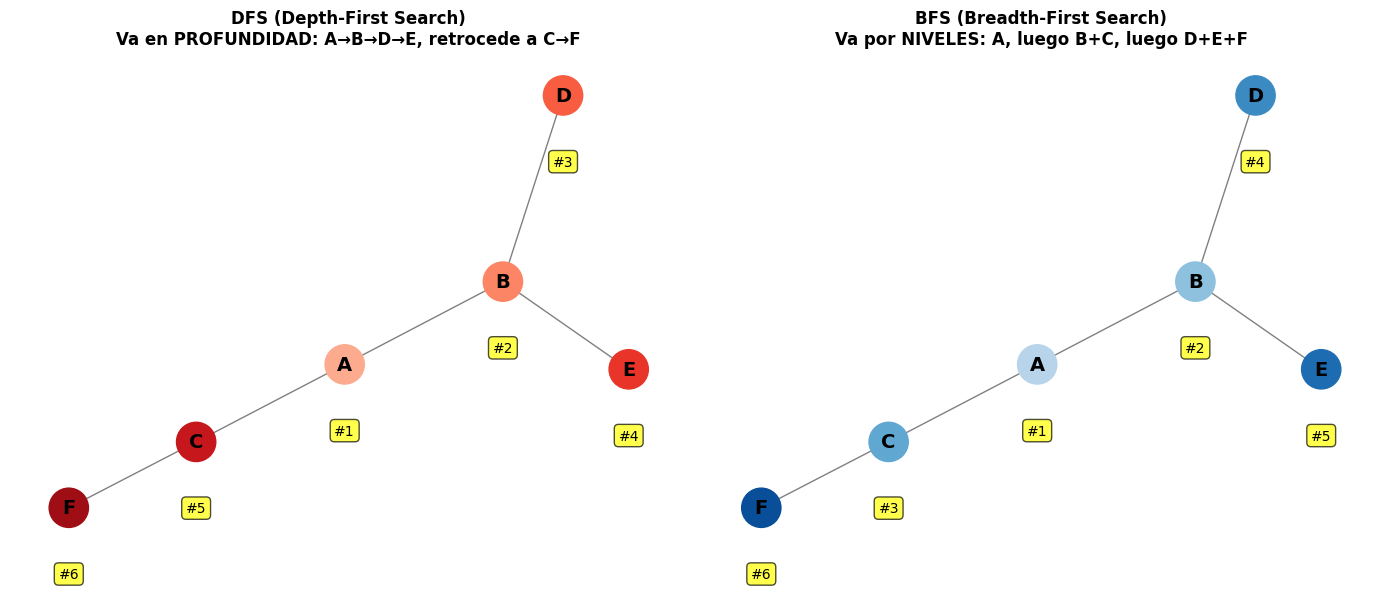

📊 Comparación de recorridos:
DFS (Profundidad): A → B → D → E → C → F
BFS (Amplitud):    A → B → C → D → E → F

🔍 Diferencia clave:
- DFS explora todo un 'camino' antes de probar otro
- BFS explora todos los vecinos inmediatos antes de avanzar


In [15]:
# Importamos librerías para graficar
import matplotlib.pyplot as plt  # Para crear gráficos
import networkx as nx  # Para crear y dibujar grafos

# Creamos un grafo simple con nodos y aristas
G = nx.Graph()  # Creamos un grafo vacío
G.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])  # Agregamos aristas

# Calculamos posiciones para los nodos (fijamos seed para consistencia)
pos = nx.spring_layout(G, seed=42)  # Layout para posicionar nodos

# Definimos el orden de visita de cada algoritmo
dfs_order = ['A','B','D','E','C','F']  # DFS: va PROFUNDO primero (A→B→D, luego retrocede)
bfs_order = ['A','B','C','D','E','F']  # BFS: va por NIVELES (A, luego B y C, luego D, E, F)

# Creamos dos subgráficos para DFS y BFS
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # Dos gráficos lado a lado

# ===== VISUALIZACIÓN DFS =====
# Asignamos colores según el orden de visita (gradiente de rojo)
colors_dfs = []
for node in G.nodes():
    if node in dfs_order:
        # Intensidad de color según orden de visita
        idx = dfs_order.index(node)
        colors_dfs.append(plt.cm.Reds(0.3 + 0.7 * idx / len(dfs_order)))
    else:
        colors_dfs.append('lightgray')

# Dibujamos el grafo con números de orden
nx.draw(G, pos, ax=axes[0], with_labels=True, node_color=colors_dfs, 
        node_size=800, font_size=14, font_weight='bold', edge_color='gray')

# Agregamos etiquetas con el orden de visita
for i, node in enumerate(dfs_order):
    x, y = pos[node]
    axes[0].text(x, y-0.15, f'#{i+1}', fontsize=10, ha='center', 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

axes[0].set_title('DFS (Depth-First Search)\nVa en PROFUNDIDAD: A→B→D→E, retrocede a C→F', 
                  fontsize=12, fontweight='bold')

# ===== VISUALIZACIÓN BFS =====
# Asignamos colores según el orden de visita (gradiente de azul)
colors_bfs = []
for node in G.nodes():
    if node in bfs_order:
        # Intensidad de color según orden de visita
        idx = bfs_order.index(node)
        colors_bfs.append(plt.cm.Blues(0.3 + 0.7 * idx / len(bfs_order)))
    else:
        colors_bfs.append('lightgray')

# Dibujamos el grafo con números de orden
nx.draw(G, pos, ax=axes[1], with_labels=True, node_color=colors_bfs, 
        node_size=800, font_size=14, font_weight='bold', edge_color='gray')

# Agregamos etiquetas con el orden de visita
for i, node in enumerate(bfs_order):
    x, y = pos[node]
    axes[1].text(x, y-0.15, f'#{i+1}', fontsize=10, ha='center',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

axes[1].set_title('BFS (Breadth-First Search)\nVa por NIVELES: A, luego B+C, luego D+E+F', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()  # Renderizamos

# Imprimimos el orden para mayor claridad
print("📊 Comparación de recorridos:")
print(f"DFS (Profundidad): {' → '.join(dfs_order)}")
print(f"BFS (Amplitud):    {' → '.join(bfs_order)}")
print("\n🔍 Diferencia clave:")
print("- DFS explora todo un 'camino' antes de probar otro")
print("- BFS explora todos los vecinos inmediatos antes de avanzar")


## Ejemplo: Resolver un Laberinto con DFS (Código comentado línea por línea)


### 🎯 Laberinto en forma de "U" - Explicación

**Este diseño es SIMPLE y muestra la diferencia perfectamente:**

```
Inicio → ⬜⬜⬜⬜⬜ ← Salida    CAMINO CORTO (arriba): 5 pasos
         ⬜ ⬛⬛⬛⬛ ⬜
         ⬜ ⬛⬛⬛⬛ ⬜         Forma de "U"
         ⬜ ⬛⬛⬛⬛ ⬜
         ⬜⬜⬜⬜⬜⬜           CAMINO LARGO (rodea): 13 pasos
```

---

**🔵 BFS (Breadth-First Search):**
- Explora **nivel por nivel** (como ondas en el agua)
- Desde (0,0) explora: (0,1), luego (1,0)
- Continúa expandiéndose por la fila superior
- **Encuentra el camino directo: 5 pasos**
- Ruta: `(0,0) → (0,1) → (0,2) → (0,3) → (0,4) → (0,5)`

---

**🔴 DFS (Depth-First Search):**
- Explora **en profundidad** (sigue un camino hasta el final)
- Con movimientos `[(1,0), (0,1), ...]` intenta ir ABAJO primero
- Desde (0,0) va a (1,0) → (2,0) → (3,0) → (4,0)
- Sigue por la fila inferior hasta (4,5)
- Sube por la columna derecha hasta (0,5)
- **Encuentra un camino largo: 13 pasos**
- Ruta: `(0,0) → (1,0) → ... → (4,0) → ... → (4,5) → ... → (0,5)`

---

**📊 Diferencia clave:**
```
✅ BFS: 5 pasos  (camino óptimo - siempre el más corto)
⚠️ DFS: 13 pasos (camino largo - encuentra uno válido pero no óptimo)
```

**Por eso BFS se usa en GPS y DFS en exploradores de archivos!**


## Comparación DFS vs BFS (Código comentado)


### 🧠 ¿Por qué DFS y BFS hacen recorridos diferentes?

La diferencia está en la **estructura de datos** que usan para decidir qué explorar después:

---

#### 🔴 **DFS (Depth-First Search) - PILA (Stack)**

```
PILA = LIFO (Last In, First Out)
"El ÚLTIMO en entrar es el PRIMERO en salir"

Imagina una pila de platos:
┌─────┐
│  C  │ ← Último en entrar
├─────┤
│  B  │
├─────┤
│  A  │ ← Primero en entrar
└─────┘

Para sacar uno, sacas el de ARRIBA (C)
```

**¿Cómo explora DFS un laberinto?**

```
Paso 1: Estoy en A
Posibles vecinos: B, C

PILA: [B, C]  (agrego vecinos)

Paso 2: Saco el ÚLTIMO → C
Estoy en C
Posibles vecinos: D, E

PILA: [B, D, E]  (agrego vecinos de C)

Paso 3: Saco el ÚLTIMO → E
Estoy en E
... y así continúa explorando PROFUNDO primero

RESULTADO: A → C → E → F → ...
(Va hasta el fondo antes de retroceder)
```

**Analogía:** Es como explorar una cueva con un solo pasillo. Vas hasta el fondo del pasillo antes de volver atrás.

---

#### 🔵 **BFS (Breadth-First Search) - COLA (Queue)**

```
COLA = FIFO (First In, First Out)
"El PRIMERO en entrar es el PRIMERO en salir"

Imagina una fila de personas:
Primera ← [A] [B] [C] [D] → Última
          ↑             ↑
       sale         entra

El primero en la fila es el primero en salir
```

**¿Cómo explora BFS un laberinto?**

```
Paso 1: Estoy en A
Posibles vecinos: B, C

COLA: [B, C]  (agrego vecinos)

Paso 2: Saco el PRIMERO → B
Estoy en B
Posibles vecinos: D

COLA: [C, D]  (agrego vecinos de B)

Paso 3: Saco el PRIMERO → C
Estoy en C
Posibles vecinos: E

COLA: [D, E]  (agrego vecinos de C)

RESULTADO: A → B → C → D → E → ...
(Explora todos los vecinos inmediatos primero)
```

**Analogía:** Es como una ola que se expande desde el centro. Primero llega a los cercanos, luego a los lejanos.

---

#### 📊 **Ejemplo Visual con Números**

Imaginemos este grafo simple:
```
    A
   / \
  B   C
 /     \
D       E
```

**Orden de exploración DFS (PILA):**
```
1. Empiezo en A
2. Agrego vecinos: [B, C]
3. Saco C (último) → exploro C
4. Agrego vecinos de C: [B, E]
5. Saco E (último) → exploro E
6. Sin vecinos, retrocedo
7. Saco B → exploro B
8. Agrego vecinos de B: [D]
9. Saco D → exploro D

ORDEN: A → C → E → B → D
(Va PROFUNDO: A→C→E antes que A→B)
```

**Orden de exploración BFS (COLA):**
```
1. Empiezo en A
2. Agrego vecinos: [B, C]
3. Saco B (primero) → exploro B
4. Agrego vecinos de B: [C, D]
5. Saco C (primero) → exploro C
6. Agrego vecinos de C: [D, E]
7. Saco D → exploro D
8. Saco E → exploro E

ORDEN: A → B → C → D → E
(Explora por NIVELES: primero B y C, luego D y E)
```

---

#### 🎯 **Resumen de la Lógica**

| Aspecto | DFS (PILA/LIFO) | BFS (COLA/FIFO) |
|---------|-----------------|-----------------|
| **Pregunta** | "¿Qué agregué más recientemente?" | "¿Qué agregué primero?" |
| **Comportamiento** | Va hasta el fondo | Explora nivel por nivel |
| **Analogía** | Explorador de cuevas | Ola que se expande |
| **Camino** | Puede ser largo | Siempre el más corto |
| **Memoria** | Menos (solo el camino actual) | Más (todos los vecinos) |

---

#### 💡 **En el Laberinto**

**DFS dice:** "Voy a ir por este camino hasta que no pueda más, luego retrocedo"
- Puede tomar desvíos largos antes de encontrar la salida

**BFS dice:** "Voy a explorar todas las casillas a 1 paso, luego a 2 pasos, luego a 3..."
- Garantiza encontrar el camino con MENOS pasos


🔍 COMPARACIÓN DFS vs BFS EN LABERINTO


📊 RESULTADOS:
   DFS encontró camino: ✅ SÍ
   BFS encontró camino: ✅ SÍ

📏 LONGITUD DE CAMINOS:
   DFS: 14 pasos
   BFS: 6 pasos
   🏆 BFS encontró el camino MÁS CORTO!

⏱️ TIEMPOS DE EJECUCIÓN:
   DFS: 0.066 ms
   BFS: 0.046 ms

🛤️ CAMINOS ENCONTRADOS:
   DFS: (0,0) → (1,0) → (2,0) → (3,0) → (4,0)...
   BFS: (0,0) → (0,1) → (0,2) → (0,3) → (0,4)...


🎬 DEMOSTRACIÓN: ¿Cómo exploran DFS y BFS?

📍 Grafo de ejemplo:

        1
       / \
      2   3
     /     \
    4       5


🔴 DFS con PILA (LIFO - Último en entrar, primero en salir):
------------------------------------------------------------
Paso 1: Empiezo en nodo 1
   PILA: [1]

Paso 2: Visito nodo 1, agrego vecinos [2, 3]
   Nodo visitado: 1
   PILA: [2, 3] ← Saco de la DERECHA (último)

Paso 3: Saco 3 (último), agrego su vecino [5]
   Nodo visitado: 3
   PILA: [2, 5]

Paso 4: Saco 5 (último), sin vecinos
   Nodo visitado: 5
   PILA: [2]

Paso 5: Saco 2, agrego su vecino [4]
   Nodo visitado:

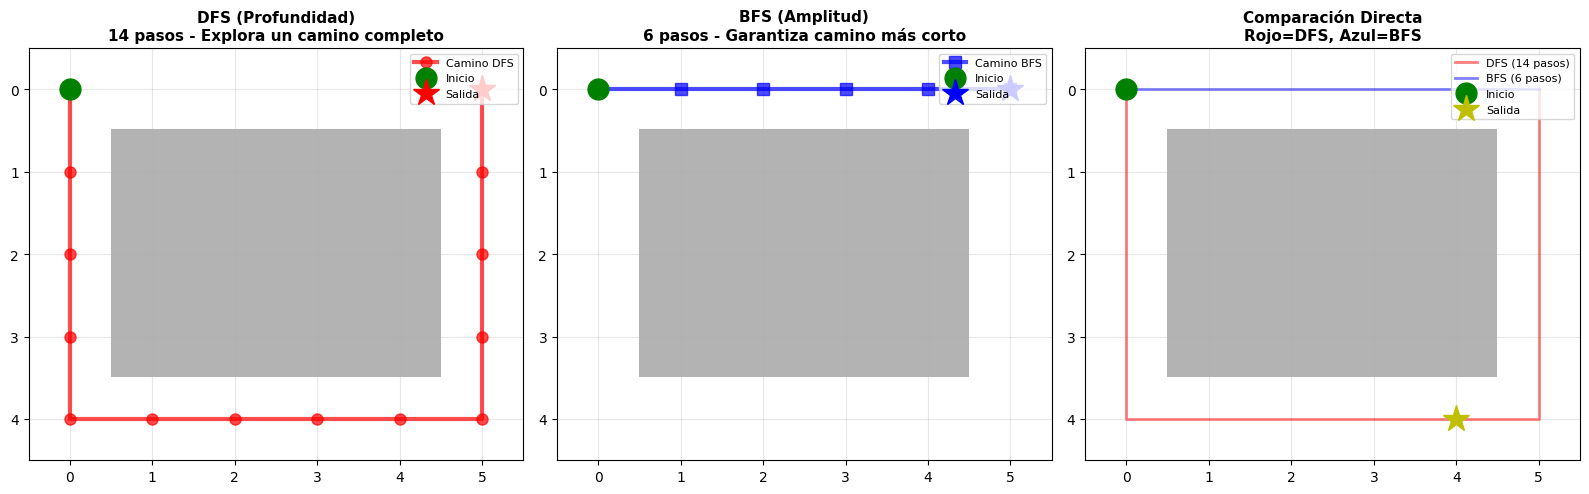


💡 DIFERENCIA CLAVE:
   🔴 DFS: Explora un camino hasta el fondo antes de retroceder (PROFUNDIDAD)
       - Usa recursión o PILA (LIFO)
       - Puede encontrar caminos largos primero
       - Usa menos memoria en general

   🔵 BFS: Explora TODOS los vecinos cercanos antes de avanzar (AMPLITUD)
       - Usa COLA (FIFO)
       - Garantiza encontrar el camino MÁS CORTO
       - Usa más memoria (guarda todos los vecinos)

   ⭐ CONCLUSIÓN: BFS SIEMPRE encuentra el camino MÁS CORTO en grafos sin pesos
      (En grafos con pesos, necesitas Dijkstra o A*)


In [16]:
# ====================
# IMPORTAMOS LIBRERÍAS NECESARIAS
# ====================
import time  # Para medir cuánto tarda cada algoritmo
from collections import deque  # Para implementar la cola de BFS (estructura de datos eficiente)
import numpy as np  # Para convertir el laberinto en array y graficarlo mejor

laberinto = [
    [0, 0, 0, 0, 0, 0],  # Fila 0: Camino superior (CORTO)
    [0, 1, 1, 1, 1, 0],  # Fila 1: Paredes en el medio
    [0, 1, 1, 1, 1, 0],  # Fila 2: Paredes en el medio
    [0, 1, 1, 1, 1, 0],  # Fila 3: Paredes en el medio
    [0, 0, 0, 0, 0, 0],  # Fila 4: Camino inferior (LARGO)
]

inicio = (0, 0)  # Inicio: esquina superior izquierda
salida = (0, 5)  # Salida: esquina superior derecha (misma fila)


# Orden de movimientos: DFS explorará ABAJO primero
# Esto fuerza a DFS a bajar por la columna izquierda antes de ir a la derecha
movimientos = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # Abajo, Derecha, Arriba, Izquierda

# Lista para almacenar el camino recorrido
camino = []  # Inicialmente vacío

def dfs_laberinto(laberinto, inicio, salida, visitados=None):
    # Si no hay conjunto de visitados, lo creamos
    if visitados is None:
        visitados = set()  # Conjunto para evitar ciclos

    # Extraemos coordenadas actuales
    x, y = inicio  # Desempaquetamos tupla

    # Validamos límites y paredes
    if x < 0 or y < 0 or x >= len(laberinto) or y >= len(laberinto[0]) or laberinto[x][y] == 1:
        return False  # Si está fuera o es pared, no seguimos

    # Si ya visitamos esta celda, no continuamos
    if inicio in visitados:
        return False

    # Marcamos la celda como visitada
    visitados.add(inicio)

    # Agregamos la celda al camino
    camino.append(inicio)

    # Si llegamos a la salida, retornamos True
    if inicio == salida:
        return True

    # Exploramos vecinos
    for dx, dy in movimientos:
        if dfs_laberinto(laberinto, (x+dx, y+dy), salida, visitados):
            return True

    # Si no encontramos salida, retrocedemos (backtracking)
    camino.pop()
    return False



# ====================
# IMPLEMENTACIÓN DE BFS PARA LABERINTOS
# ====================
def bfs_laberinto(laberinto, inicio, salida):
    """
    BFS (Breadth-First Search) explora nivel por nivel (amplitud).
    
    DIFERENCIA CLAVE CON DFS:
    - BFS usa una COLA (FIFO = First In First Out): primero en entrar, primero en salir
    - DFS usa una PILA (LIFO = Last In First Out): último en entrar, primero en salir
    
    VENTAJA DE BFS: Garantiza encontrar el camino MÁS CORTO
    
    Parámetros:
    - laberinto: matriz con 0 (camino) y 1 (pared)
    - inicio: tupla (x, y) con posición inicial
    - salida: tupla (x, y) con posición de salida
    
    Retorna:
    - Lista con el camino completo desde inicio hasta salida
    - Lista vacía si no hay camino
    """
    
    # INICIALIZAMOS LAS ESTRUCTURAS DE DATOS
    visitados = set([inicio])  # Set para rastrear posiciones ya exploradas (búsqueda rápida O(1))
    # Cola: cada elemento es una tupla (posición_actual, camino_completo_hasta_aquí)
    cola = deque([(inicio, [inicio])])  # Empezamos con la posición inicial
    
    # BUCLE PRINCIPAL: Mientras haya posiciones por explorar
    while cola:  # Se ejecuta hasta que la cola esté vacía
        # Sacamos el PRIMER elemento de la cola (esto es lo que hace que sea BFS)
        (x, y), path = cola.popleft()  # popleft() saca del inicio (FIFO)
        # Desempaquetamos: (x,y) es la posición, path es la lista del camino
        
        # VERIFICAMOS SI LLEGAMOS A LA SALIDA
        if (x, y) == salida:  # Comparamos tuplas
            return path  # ¡Éxito! Retornamos el camino completo
        
        # EXPLORAMOS LOS 4 VECINOS (arriba, abajo, izquierda, derecha)
        for dx, dy in movimientos:  # movimientos fue definido antes: [(1,0), (-1,0), (0,1), (0,-1)]
            # Calculamos las coordenadas del vecino
            nx, ny = x + dx, y + dy  # nx = nueva x, ny = nueva y
            
            # VERIFICAMOS QUE EL VECINO SEA VÁLIDO
            # Condición 1: Está dentro de los límites (0 <= nx < filas)
            # Condición 2: Está dentro de los límites (0 <= ny < columnas)
            # Condición 3: Es un camino (laberinto[nx][ny] == 0, no una pared)
            # Condición 4: No lo hemos visitado antes ((nx, ny) not in visitados)
            if (0 <= nx < len(laberinto) and  # Verifica límite superior/inferior
                0 <= ny < len(laberinto[0]) and  # Verifica límite izquierdo/derecho
                laberinto[nx][ny] == 0 and  # Verifica que sea camino (no pared)
                (nx, ny) not in visitados):  # Verifica que no esté visitado
                
                # SI ES VÁLIDO, LO PROCESAMOS
                visitados.add((nx, ny))  # Marcamos como visitado para no volver
                # Agregamos a la cola: nueva posición + camino extendido
                cola.append(((nx, ny), path + [(nx, ny)]))  # path + [...] concatena listas
    
    # Si salimos del while sin encontrar salida
    return []  # Lista vacía indica que no hay camino posible

# ====================
# EJECUTAMOS AMBOS ALGORITMOS Y LOS COMPARAMOS
# ====================
print("🔍 COMPARACIÓN DFS vs BFS EN LABERINTO\n")  # Título de la sección
print("=" * 60)  # Línea decorativa (60 signos '=')

# ===== PASO 1: EJECUTAMOS DFS =====
# ⚠️ IMPORTANTE: Limpiamos la variable global 'camino' antes de cada ejecución
camino = []  # Reseteamos la variable GLOBAL (no local)
start_dfs = time.time()  # Guardamos el tiempo de inicio (en segundos desde 1970)

# Llamamos a la función DFS definida anteriormente
resultado_dfs = dfs_laberinto(laberinto, inicio, salida)  # Retorna True/False
# La función DFS modifica la variable global 'camino' como efecto secundario
camino_dfs = camino.copy()  # Copiamos el camino encontrado por DFS (.copy() crea una copia independiente)

end_dfs = time.time()  # Guardamos el tiempo de finalización
# El tiempo total será: end_dfs - start_dfs

# ===== PASO 2: EJECUTAMOS BFS =====
start_bfs = time.time()  # Tiempo de inicio de BFS

# Llamamos a la función BFS que acabamos de definir
camino_bfs = bfs_laberinto(laberinto, inicio, salida)  # Retorna lista con el camino
# BFS retorna directamente el camino (no usa variables globales como DFS)

end_bfs = time.time()  # Tiempo de finalización de BFS

# ====================
# PASO 3: COMPARAMOS LOS RESULTADOS
# ====================

# ===== VERIFICAMOS SI ENCONTRARON SOLUCIÓN =====
print(f"\n📊 RESULTADOS:")
# Operador ternario: 'valor_si_true' if condicion else 'valor_si_false'
print(f"   DFS encontró camino: {'✅ SÍ' if resultado_dfs else '❌ NO'}")  # resultado_dfs es True/False
print(f"   BFS encontró camino: {'✅ SÍ' if camino_bfs else '❌ NO'}")  # Lista vacía [] es False en Python

# ===== COMPARAMOS LA LONGITUD DE LOS CAMINOS =====
print(f"\n📏 LONGITUD DE CAMINOS:")
print(f"   DFS: {len(camino_dfs)} pasos")  # len() cuenta elementos en la lista
print(f"   BFS: {len(camino_bfs)} pasos")

# Comparamos cuál es más corto
if len(camino_bfs) < len(camino_dfs):  # Si BFS encontró un camino más corto
    print(f"   🏆 BFS encontró el camino MÁS CORTO!")
else:  # Si son iguales o DFS fue más corto (raro)
    print(f"   ⚖️ Ambos encontraron caminos similares")

# ===== COMPARAMOS LOS TIEMPOS DE EJECUCIÓN =====
print(f"\n⏱️ TIEMPOS DE EJECUCIÓN:")
# Multiplicamos por 1000 para convertir segundos a milisegundos
# :.3f formatea el número con 3 decimales
print(f"   DFS: {(end_dfs - start_dfs)*1000:.3f} ms")  # ms = milisegundos
print(f"   BFS: {(end_bfs - start_bfs)*1000:.3f} ms")

# ===== MOSTRAMOS LOS CAMINOS ENCONTRADOS =====
print(f"\n🛤️ CAMINOS ENCONTRADOS:")
# List comprehension: [expresion for item in lista]
# Creamos una lista de strings con formato '(x,y)' para cada posición
# [:5] toma solo los primeros 5 elementos
# '...' se agrega si hay más de 5 elementos
print(f"   DFS: {' → '.join([f'({x},{y})' for x,y in camino_dfs[:5]])}{'...' if len(camino_dfs) > 5 else ''}")
# join() une los elementos con ' → ' entre ellos
print(f"   BFS: {' → '.join([f'({x},{y})' for x,y in camino_bfs[:5]])}{'...' if len(camino_bfs) > 5 else ''}")

print("\n" + "=" * 60)  # Línea separadora final

# ====================
# DEMOSTRACIÓN: SIMULACIÓN PASO A PASO
# ====================
print("\n" + "=" * 60)
print("🎬 DEMOSTRACIÓN: ¿Cómo exploran DFS y BFS?")
print("=" * 60)

# Simulamos un grafo simple con orden de exploración
print("\n📍 Grafo de ejemplo:")
print("""
        1
       / \\
      2   3
     /     \\
    4       5
""")

print("\n🔴 DFS con PILA (LIFO - Último en entrar, primero en salir):")
print("-" * 60)

# Simulación DFS
pila_dfs = []  # Pila vacía
visitados_dfs = []  # Orden de visita

print("Paso 1: Empiezo en nodo 1")
pila_dfs.append(1)
print(f"   PILA: {pila_dfs}")

print("\nPaso 2: Visito nodo 1, agrego vecinos [2, 3]")
actual = pila_dfs.pop()  # Saco el último
visitados_dfs.append(actual)
pila_dfs.extend([2, 3])  # Agrego vecinos
print(f"   Nodo visitado: {actual}")
print(f"   PILA: {pila_dfs} ← Saco de la DERECHA (último)")

print("\nPaso 3: Saco 3 (último), agrego su vecino [5]")
actual = pila_dfs.pop()  # Saco 3
visitados_dfs.append(actual)
pila_dfs.append(5)
print(f"   Nodo visitado: {actual}")
print(f"   PILA: {pila_dfs}")

print("\nPaso 4: Saco 5 (último), sin vecinos")
actual = pila_dfs.pop()
visitados_dfs.append(actual)
print(f"   Nodo visitado: {actual}")
print(f"   PILA: {pila_dfs}")

print("\nPaso 5: Saco 2, agrego su vecino [4]")
actual = pila_dfs.pop()
visitados_dfs.append(actual)
pila_dfs.append(4)
print(f"   Nodo visitado: {actual}")
print(f"   PILA: {pila_dfs}")

print("\nPaso 6: Saco 4, sin vecinos")
actual = pila_dfs.pop()
visitados_dfs.append(actual)
print(f"   Nodo visitado: {actual}")
print(f"   PILA: {pila_dfs} (vacía)")

print(f"\n✅ ORDEN FINAL DFS: {' → '.join(map(str, visitados_dfs))}")
print("   ¡Fue PROFUNDO primero! (1→3→5 antes que 1→2)")

print("\n" + "=" * 60)
print("\n🔵 BFS con COLA (FIFO - Primero en entrar, primero en salir):")
print("-" * 60)

# Simulación BFS
cola_bfs = deque()  # Cola vacía
visitados_bfs = []  # Orden de visita

print("Paso 1: Empiezo en nodo 1")
cola_bfs.append(1)
print(f"   COLA: {list(cola_bfs)}")

print("\nPaso 2: Visito nodo 1, agrego vecinos [2, 3]")
actual = cola_bfs.popleft()  # Saco el primero
visitados_bfs.append(actual)
cola_bfs.extend([2, 3])
print(f"   Nodo visitado: {actual}")
print(f"   COLA: {list(cola_bfs)} ← Saco de la IZQUIERDA (primero)")

print("\nPaso 3: Saco 2 (primero), agrego su vecino [4]")
actual = cola_bfs.popleft()  # Saco 2
visitados_bfs.append(actual)
cola_bfs.append(4)
print(f"   Nodo visitado: {actual}")
print(f"   COLA: {list(cola_bfs)}")

print("\nPaso 4: Saco 3 (primero), agrego su vecino [5]")
actual = cola_bfs.popleft()
visitados_bfs.append(actual)
cola_bfs.append(5)
print(f"   Nodo visitado: {actual}")
print(f"   COLA: {list(cola_bfs)}")

print("\nPaso 5: Saco 4 (primero), sin vecinos")
actual = cola_bfs.popleft()
visitados_bfs.append(actual)
print(f"   Nodo visitado: {actual}")
print(f"   COLA: {list(cola_bfs)}")

print("\nPaso 6: Saco 5 (primero), sin vecinos")
actual = cola_bfs.popleft()
visitados_bfs.append(actual)
print(f"   Nodo visitado: {actual}")
print(f"   COLA: {list(cola_bfs)} (vacía)")

print(f"\n✅ ORDEN FINAL BFS: {' → '.join(map(str, visitados_bfs))}")
print("   ¡Fue por NIVELES! (1, luego 2 y 3, luego 4 y 5)")

print("\n" + "=" * 60)
print("\n🎯 CONCLUSIÓN:")
print("   DFS (PILA):  1 → 3 → 5 → 2 → 4  (va al fondo primero)")
print("   BFS (COLA):  1 → 2 → 3 → 4 → 5  (explora nivel por nivel)")
print("=" * 60 + "\n")

# ====================
# PASO 4: VISUALIZACIÓN GRÁFICA MEJORADA
# ====================

# CREAMOS UNA FIGURA CON 3 GRÁFICOS LADO A LADO
# subplots(filas, columnas, tamaño)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # 1 fila, 3 columnas, 16x5 pulgadas

# CONVERTIMOS EL LABERINTO A NUMPY ARRAY
# Esto permite usar funciones de matplotlib más fácilmente
lab_array = np.array(laberinto)  # Convierte lista de listas a array 2D

# ===== GRÁFICO 1: CAMINO DFS =====
# imshow() muestra la matriz como imagen
# cmap='Greys' usa escala de grises (0=blanco/camino, 1=negro/pared)
# alpha=0.3 hace el laberinto semitransparente
axes[0].imshow(lab_array, cmap='Greys', alpha=0.3)

if camino_dfs:  # Si DFS encontró un camino
    # zip(*camino_dfs) desempaqueta lista de tuplas en dos listas separadas
    # Ejemplo: [(0,0), (1,0), (2,0)] -> xs=[0,1,2], ys=[0,0,0]
    xs, ys = zip(*camino_dfs)
    
    # DIBUJAMOS EL CAMINO
    # plot(columnas, filas) - ¡OJO! matplotlib usa (x,y) no (fila,col)
    axes[0].plot(ys, xs, color='red', linewidth=3, marker='o', markersize=8, 
                 alpha=0.7, label='Camino DFS')
    
    # MARCAMOS INICIO Y FIN
    axes[0].plot(ys[0], xs[0], 'go', markersize=15, label='Inicio')  # 'go' = green circle
    axes[0].plot(ys[-1], xs[-1], 'r*', markersize=20, label='Salida')  # 'r*' = red star

# CONFIGURAMOS EL GRÁFICO
axes[0].set_title(f'DFS (Profundidad)\n{len(camino_dfs)} pasos - Explora un camino completo', 
                  fontsize=11, fontweight='bold')  # Título con \n para salto de línea
axes[0].legend(loc='upper right', fontsize=8)  # Leyenda en esquina superior derecha
axes[0].grid(True, alpha=0.3)  # Grid semitransparente para ver coordenadas
axes[0].set_xticks(range(len(laberinto[0])))  # Marcas en eje X (columnas)
axes[0].set_yticks(range(len(laberinto)))  # Marcas en eje Y (filas)

# ===== GRÁFICO 2: CAMINO BFS =====
axes[1].imshow(lab_array, cmap='Greys', alpha=0.3)  # Mismo fondo que antes

if camino_bfs:  # Si BFS encontró un camino
    xs, ys = zip(*camino_bfs)  # Desempaquetamos coordenadas
    
    # DIBUJAMOS EL CAMINO (con cuadrados 's' en vez de círculos 'o')
    axes[1].plot(ys, xs, color='blue', linewidth=3, marker='s', markersize=8, 
                 alpha=0.7, label='Camino BFS')
    
    # MARCAMOS INICIO Y FIN
    axes[1].plot(ys[0], xs[0], 'go', markersize=15, label='Inicio')
    axes[1].plot(ys[-1], xs[-1], 'b*', markersize=20, label='Salida')  # Estrella azul

# CONFIGURAMOS EL GRÁFICO
axes[1].set_title(f'BFS (Amplitud)\n{len(camino_bfs)} pasos - Garantiza camino más corto', 
                  fontsize=11, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=8)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(len(laberinto[0])))
axes[1].set_yticks(range(len(laberinto)))

# ===== GRÁFICO 3: COMPARACIÓN SUPERPUESTA =====
axes[2].imshow(lab_array, cmap='Greys', alpha=0.3)  # Mismo fondo

# DIBUJAMOS AMBOS CAMINOS EN EL MISMO GRÁFICO
if camino_dfs:
    xs_dfs, ys_dfs = zip(*camino_dfs)
    # Línea roja para DFS (alpha=0.5 para verlas superpuestas)
    axes[2].plot(ys_dfs, xs_dfs, 'r-', linewidth=2, alpha=0.5, 
                 label=f'DFS ({len(camino_dfs)} pasos)')

if camino_bfs:
    xs_bfs, ys_bfs = zip(*camino_bfs)
    # Línea azul para BFS
    axes[2].plot(ys_bfs, xs_bfs, 'b-', linewidth=2, alpha=0.5, 
                 label=f'BFS ({len(camino_bfs)} pasos)')

# MARCAMOS INICIO Y FIN (coordenadas fijas del laberinto)
axes[2].plot(0, 0, 'go', markersize=15, label='Inicio')  # (0,0) = esquina superior izquierda
axes[2].plot(4, 4, 'y*', markersize=20, label='Salida')  # (4,4) = esquina inferior derecha

# CONFIGURAMOS EL GRÁFICO
axes[2].set_title('Comparación Directa\nRojo=DFS, Azul=BFS', 
                  fontsize=11, fontweight='bold')
axes[2].legend(loc='upper right', fontsize=8)
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(range(len(laberinto[0])))
axes[2].set_yticks(range(len(laberinto)))

# AJUSTAMOS EL LAYOUT PARA QUE NO SE SUPERPONGAN
plt.tight_layout()  # Ajusta automáticamente el espaciado
plt.show()  # Mostramos los gráficos

# ====================
# PASO 5: EXPLICACIÓN FINAL Y RESUMEN
# ====================
print("\n💡 DIFERENCIA CLAVE:")
print("   🔴 DFS: Explora un camino hasta el fondo antes de retroceder (PROFUNDIDAD)")
print("       - Usa recursión o PILA (LIFO)")
print("       - Puede encontrar caminos largos primero")
print("       - Usa menos memoria en general")
print()
print("   🔵 BFS: Explora TODOS los vecinos cercanos antes de avanzar (AMPLITUD)")
print("       - Usa COLA (FIFO)")
print("       - Garantiza encontrar el camino MÁS CORTO")
print("       - Usa más memoria (guarda todos los vecinos)")
print()
print("   ⭐ CONCLUSIÓN: BFS SIEMPRE encuentra el camino MÁS CORTO en grafos sin pesos")
print("      (En grafos con pesos, necesitas Dijkstra o A*)")


## Interactividad con ipywidgets (Código comentado)


In [ ]:
import ipywidgets as widgets  # Para crear controles interactivos
import random  # Para generar laberintos aleatorios

def generar_laberinto(n, densidad):
    return [[1 if random.random() < densidad else 0 for _ in range(n)] for _ in range(n)]

def resolver_laberinto(n=5, densidad=0.3):
    lab = generar_laberinto(n, densidad)
    lab[0][0] = 0
    lab[n-1][n-1] = 0
    global camino
    camino = []
    dfs_laberinto(lab, (0,0), (n-1,n-1))
    fig, ax = plt.subplots()
    ax.imshow(lab, cmap='gray')
    if camino:
        xs, ys = zip(*camino)
        ax.plot(ys, xs, color='red', linewidth=2, marker='o')
    ax.set_title('Laberinto generado')
    plt.show()

widgets.interact(resolver_laberinto, n=widgets.IntSlider(min=5, max=15, step=1, value=5), densidad=widgets.FloatSlider(min=0.1, max=0.6, step=0.05, value=0.3))


interactive(children=(IntSlider(value=5, description='n', max=15, min=5), FloatSlider(value=0.3, description='…

<function __main__.resolver_laberinto(n=5, densidad=0.3)>

## 🌍 Casos Reales: Aplicaciones de DFS y BFS

Ahora veremos ejemplos prácticos del mundo real donde estos algoritmos son fundamentales.

### 📋 ¿Cuándo usar cada uno?

**🔴 DFS es mejor para:**
- Detectar ciclos en dependencias (compiladores, gestores de paquetes)
- Resolver puzzles con backtracking (Sudoku, N-Queens)
- Explorar rutas completas (crawlers web)
- Buscar en estructuras profundas (sistemas de archivos)

**🔵 BFS es mejor para:**
- Encontrar el camino más corto (GPS, redes)
- Analizar redes sociales (grados de separación)
- Encontrar vecinos más cercanos
- Resolver puzzles de forma óptima


### Ejemplo 1: 🌐 Red Social - Grados de Separación (BFS)

**Problema:** ¿Cuántos pasos hay entre dos personas? (Como "6 grados de separación")


In [18]:
from collections import deque  # Importamos deque para usar colas eficientes

# ==========================================
# PASO 1: DEFINIMOS LA RED SOCIAL
# ==========================================
# Cada persona tiene una lista de amigos (grafo no dirigido)
red_social = {
    'Ana': ['Bob', 'Carlos'],              # Ana es amiga de Bob y Carlos
    'Bob': ['Ana', 'Diana', 'Elena'],      # Bob es amigo de Ana, Diana y Elena
    'Carlos': ['Ana', 'Felipe'],           # Carlos es amigo de Ana y Felipe
    'Diana': ['Bob', 'Gina'],              # Diana es amiga de Bob y Gina
    'Elena': ['Bob', 'Hector'],            # Elena es amiga de Bob y Hector
    'Felipe': ['Carlos', 'Ivan'],          # Felipe es amigo de Carlos e Ivan
    'Gina': ['Diana'],                     # Gina es amiga de Diana
    'Hector': ['Elena', 'Ivan'],           # Hector es amigo de Elena e Ivan
    'Ivan': ['Felipe', 'Hector']           # Ivan es amigo de Felipe y Hector
}

# ==========================================
# PASO 2: FUNCIÓN BFS PARA ENCONTRAR GRADOS DE SEPARACIÓN
# ==========================================
def grados_separacion_bfs(red, persona_origen, persona_destino):
    """
    Encuentra el camino MÁS CORTO entre dos personas usando BFS.
    BFS explora nivel por nivel, garantizando el mínimo de conexiones.
    
    Parámetros:
    - red: diccionario con las conexiones
    - persona_origen: persona inicial
    - persona_destino: persona que buscamos
    
    Retorna:
    - camino: lista con el recorrido completo
    - grados: número de conexiones (longitud del camino - 1)
    """
    
    # CASO BASE: Si origen y destino son la misma persona
    if persona_origen == persona_destino:
        return [persona_origen], 0  # Retornamos la persona y 0 grados
    
    # INICIALIZAMOS LA COLA Y VISITADOS
    # Cola: guardamos tuplas (persona_actual, camino_hasta_aquí)
    cola = deque([(persona_origen, [persona_origen])])  # Empezamos desde el origen
    visitados = {persona_origen}  # Marcamos origen como visitado (set para búsqueda rápida)
    
    # BUCLE PRINCIPAL DE BFS
    while cola:  # Mientras haya personas por explorar
        # Sacamos el PRIMERO de la cola (FIFO = First In First Out)
        persona_actual, camino = cola.popleft()  # Desempaquetamos tupla
        
        # EXPLORAMOS TODOS LOS AMIGOS DE LA PERSONA ACTUAL
        for amigo in red[persona_actual]:  # Iteramos sobre lista de amigos
            
            # Solo procesamos amigos NO visitados
            if amigo not in visitados:  # Evitamos ciclos
                
                # Construimos el nuevo camino agregando al amigo
                nuevo_camino = camino + [amigo]  # Concatenamos listas
                
                # ¿ES LA PERSONA QUE BUSCAMOS?
                if amigo == persona_destino:  # ¡Éxito!
                    # Retornamos el camino completo y el número de grados
                    return nuevo_camino, len(nuevo_camino) - 1  # -1 porque contamos conexiones, no personas
                
                # SI NO ES EL DESTINO, LO AGREGAMOS A LA COLA
                visitados.add(amigo)  # Marcamos como visitado
                cola.append((amigo, nuevo_camino))  # Agregamos a la cola para explorar después
    
    # Si salimos del while sin encontrar destino, no hay conexión
    return None, float('inf')  # Retornamos None y "infinito" grados

# ==========================================
# PASO 3: PROBAMOS LA FUNCIÓN CON VARIAS CONEXIONES
# ==========================================
print("🌐 ANÁLISIS DE RED SOCIAL\n")  # Título
print("=" * 60)  # Línea separadora (60 caracteres '=')

# Lista de pares de personas para buscar conexiones
conexiones = [
    ('Ana', 'Gina'),      # ¿Cómo llegar de Ana a Gina?
    ('Ana', 'Ivan'),      # ¿Cómo llegar de Ana a Ivan?
    ('Carlos', 'Hector'), # ¿Cómo llegar de Carlos a Hector?
    ('Bob', 'Ivan')       # ¿Cómo llegar de Bob a Ivan?
]

# Iteramos sobre cada par de personas
for origen, destino in conexiones:  # Desempaquetamos tupla
    # Llamamos a la función BFS para encontrar el camino
    camino, grados = grados_separacion_bfs(red_social, origen, destino)
    
    # Si encontramos un camino (no es None)
    if camino:
        print(f"\n{origen} → {destino}")  # Mostramos la conexión buscada
        print(f"   Grados de separación: {grados}")  # Número de conexiones
        # Unimos el camino con flechas para visualizarlo mejor
        print(f"   Camino: {' → '.join(camino)}")  # join() une lista con ' → '
    else:
        # Si no hay camino
        print(f"\n{origen} y {destino} no están conectados")

# Mensaje final
print("\n" + "=" * 60)  # Otra línea separadora
print("💡 BFS encuentra el MENOR número de conexiones entre personas")


🌐 ANÁLISIS DE RED SOCIAL


Ana → Gina
   Grados de separación: 3
   Camino: Ana → Bob → Diana → Gina

Ana → Ivan
   Grados de separación: 3
   Camino: Ana → Carlos → Felipe → Ivan

Carlos → Hector
   Grados de separación: 3
   Camino: Carlos → Felipe → Ivan → Hector

Bob → Ivan
   Grados de separación: 3
   Camino: Bob → Elena → Hector → Ivan

💡 BFS encuentra el MENOR número de conexiones entre personas


### Ejemplo 2: 📦 Gestor de Paquetes - Detectar Dependencias Circulares (DFS)

**Problema:** ¿Hay ciclos en las dependencias? (Como npm, pip, Maven)


In [19]:
# ==========================================
# PASO 1: DEFINIMOS EL SISTEMA DE PAQUETES
# ==========================================
# Cada paquete tiene una lista de dependencias (grafo dirigido)
# Ejemplo: 'webapp' necesita 'database', 'auth' y 'frontend' para funcionar
paquetes = {
    'webapp': ['database', 'auth', 'frontend'],    # webapp depende de estos 3
    'database': ['orm', 'connection-pool'],        # database necesita orm y connection-pool
    'auth': ['crypto', 'jwt'],                     # auth necesita crypto y jwt
    'frontend': ['react', 'router'],               # frontend necesita react y router
    'orm': ['database-driver'],                    # orm necesita database-driver
    'connection-pool': [],                         # connection-pool no tiene dependencias
    'crypto': [],                                  # crypto no tiene dependencias
    'jwt': ['crypto'],                             # jwt depende de crypto
    'react': [],                                   # react no tiene dependencias
    'router': [],                                  # router no tiene dependencias
    'database-driver': []                          # database-driver no tiene dependencias
}

# ==========================================
# PASO 2: FUNCIÓN DFS PARA DETECTAR CICLOS
# ==========================================
def detectar_ciclo_dfs(grafo, nodo, visitados, pila_recursion):
    """
    Detecta ciclos usando DFS con recursión.
    
    Parámetros:
    - grafo: diccionario de dependencias
    - nodo: paquete actual que estamos explorando
    - visitados: set de todos los nodos que hemos visto
    - pila_recursion: set de nodos en el CAMINO ACTUAL (para detectar ciclos)
    
    Retorna:
    - Lista con el ciclo si lo encuentra
    - None si no hay ciclo
    """
    
    # MARCAMOS EL NODO COMO VISITADO
    visitados.add(nodo)  # Lo agregamos al conjunto de visitados (permanente)
    pila_recursion.add(nodo)  # Lo agregamos a la pila actual (temporal)
    
    # EXPLORAMOS TODAS LAS DEPENDENCIAS DEL NODO ACTUAL
    for dependencia in grafo.get(nodo, []):  # .get() retorna [] si nodo no existe
        
        # CASO 1: Si la dependencia NO ha sido visitada
        if dependencia not in visitados:
            # Llamada RECURSIVA para explorar esa dependencia
            ciclo = detectar_ciclo_dfs(grafo, dependencia, visitados, pila_recursion)
            
            # Si encontramos un ciclo en la recursión, lo propagamos
            if ciclo:  # ciclo no es None
                return [nodo] + ciclo  # Agregamos el nodo actual al ciclo
        
        # CASO 2: Si la dependencia YA está en la pila de recursión actual
        elif dependencia in pila_recursion:
            # ¡CICLO DETECTADO! La dependencia ya está en nuestro camino actual
            return [nodo, dependencia]  # Retornamos el ciclo (mínimo 2 nodos)
    
    # BACKTRACKING: Quitamos el nodo de la pila al terminar de explorar
    pila_recursion.remove(nodo)  # Ya terminamos con este camino
    return None  # No encontramos ciclo desde este nodo

# ==========================================
# PASO 3: FUNCIÓN PARA VERIFICAR TODO EL SISTEMA
# ==========================================
def verificar_dependencias(grafo):
    """
    Verifica todos los paquetes en busca de ciclos.
    Necesitamos revisar TODOS porque el grafo puede tener componentes desconectados.
    """
    visitados = set()  # Conjunto para rastrear paquetes ya verificados
    
    # Iteramos sobre TODOS los paquetes
    for paquete in grafo:  # Para cada paquete en el diccionario
        
        # Solo verificamos paquetes no visitados (optimización)
        if paquete not in visitados:
            # Llamamos a DFS con un nuevo conjunto de pila_recursion
            ciclo = detectar_ciclo_dfs(grafo, paquete, visitados, set())
            
            # Si encontramos un ciclo, lo retornamos inmediatamente
            if ciclo:  # ciclo no es None
                return ciclo  # Retornamos el ciclo encontrado
    
    # Si revisamos todo y no encontramos ciclos
    return None  # Sistema válido

# ==========================================
# PASO 4: VERIFICAMOS EL SISTEMA ACTUAL (SIN CICLOS)
# ==========================================
print("📦 GESTOR DE PAQUETES - VERIFICACIÓN DE DEPENDENCIAS\n")  # Título
print("=" * 60)  # Línea separadora

# Llamamos a la función de verificación con nuestro sistema de paquetes
ciclo = verificar_dependencias(paquetes)  # Retorna None o una lista con el ciclo

# Verificamos el resultado
if ciclo:  # Si ciclo no es None (se encontró un ciclo)
    print(f"❌ ERROR: Dependencia circular detectada!")
    # Unimos los elementos del ciclo con flechas
    print(f"   Ciclo: {' → '.join(ciclo)}")
else:  # Si ciclo es None (no hay ciclos)
    print("✅ Sistema válido: No hay dependencias circulares")

# ==========================================
# PASO 5: SIMULAMOS UN ERROR (INTRODUCIMOS UN CICLO)
# ==========================================
print("\n\n🔧 Simulando error: agregamos dependencia circular...")

# Copiamos el diccionario para no modificar el original
paquetes_con_ciclo = paquetes.copy()  # Creamos una copia superficial

# INTRODUCIMOS EL CICLO: database-driver ahora depende de orm
# Esto crea: orm → database-driver → orm (¡ciclo!)
paquetes_con_ciclo['database-driver'] = ['orm']  # Modificamos la copia

# Verificamos de nuevo con el sistema que tiene ciclo
ciclo = verificar_dependencias(paquetes_con_ciclo)  # Ahora debería encontrar el ciclo

# Mostramos el resultado
if ciclo:  # Debería entrar aquí
    print(f"\n❌ ERROR: Dependencia circular detectada!")
    # Mostramos el ciclo encontrado
    print(f"   Ciclo: {' → '.join(ciclo)}")
    # Explicación didáctica
    print("\n💡 DFS detecta ciclos eficientemente explorando caminos completos")

print("\n" + "=" * 60)  # Línea final


📦 GESTOR DE PAQUETES - VERIFICACIÓN DE DEPENDENCIAS

✅ Sistema válido: No hay dependencias circulares


🔧 Simulando error: agregamos dependencia circular...

❌ ERROR: Dependencia circular detectada!
   Ciclo: webapp → database → orm → database-driver → orm

💡 DFS detecta ciclos eficientemente explorando caminos completos



### Ejemplo 3: 🗺️ Sistema GPS - Ruta Más Corta (BFS)

**Problema:** Encontrar la ruta con menos paradas entre dos ciudades.


In [20]:
from collections import deque  # Importamos deque para colas eficientes

# ==========================================
# PASO 1: DEFINIMOS EL MAPA DE CARRETERAS
# ==========================================
# Cada ciudad tiene una lista de ciudades directamente conectadas (grafo no dirigido)
# Si Madrid conecta con Barcelona, Barcelona también conecta con Madrid
mapa_ciudades = {
    'Madrid': ['Barcelona', 'Valencia', 'Sevilla'],      # Madrid conecta con estas 3 ciudades
    'Barcelona': ['Madrid', 'Valencia', 'Zaragoza'],     # Barcelona conecta con estas 3
    'Valencia': ['Madrid', 'Barcelona', 'Alicante'],     # Valencia conecta con estas 3
    'Sevilla': ['Madrid', 'Málaga', 'Córdoba'],          # Sevilla conecta con estas 3
    'Zaragoza': ['Barcelona', 'Bilbao'],                 # Zaragoza conecta con estas 2
    'Alicante': ['Valencia', 'Murcia'],                  # Alicante conecta con estas 2
    'Málaga': ['Sevilla', 'Granada'],                    # Málaga conecta con estas 2
    'Córdoba': ['Sevilla', 'Granada'],                   # Córdoba conecta con estas 2
    'Bilbao': ['Zaragoza', 'Santander'],                 # Bilbao conecta con estas 2
    'Murcia': ['Alicante', 'Granada'],                   # Murcia conecta con estas 2
    'Granada': ['Málaga', 'Córdoba', 'Murcia'],          # Granada conecta con estas 3
    'Santander': ['Bilbao']                              # Santander solo conecta con Bilbao
}

# ==========================================
# PASO 2: FUNCIÓN BFS PARA ENCONTRAR RUTA MÁS CORTA
# ==========================================
def ruta_mas_corta_bfs(mapa, origen, destino):
    """
    Encuentra la ruta con MENOS paradas entre dos ciudades usando BFS.
    BFS explora nivel por nivel, garantizando encontrar el camino más corto.
    
    Parámetros:
    - mapa: diccionario con las conexiones entre ciudades
    - origen: ciudad de inicio
    - destino: ciudad destino
    
    Retorna:
    - ruta: lista con las ciudades del camino
    - paradas: número de paradas (longitud - 1)
    """
    
    # CASO BASE: Si origen y destino son iguales
    if origen == destino:
        return [origen], 0  # Ya estamos ahí, 0 paradas
    
    # INICIALIZAMOS LA COLA Y VISITADOS
    # Cola: guardamos tuplas (ciudad_actual, ruta_hasta_aquí)
    cola = deque([(origen, [origen])])  # Empezamos desde el origen
    visitados = {origen}  # Conjunto de ciudades ya exploradas
    
    # BUCLE PRINCIPAL DE BFS
    while cola:  # Mientras haya ciudades por explorar
        # Sacamos el PRIMERO de la cola (FIFO)
        ciudad_actual, ruta = cola.popleft()  # Desempaquetamos tupla
        
        # EXPLORAMOS TODAS LAS CIUDADES CONECTADAS
        for ciudad_vecina in mapa[ciudad_actual]:  # Para cada ciudad conectada
            
            # Solo procesamos ciudades NO visitadas
            if ciudad_vecina not in visitados:  # Evitamos volver atrás
                
                # Construimos la nueva ruta agregando la ciudad vecina
                nueva_ruta = ruta + [ciudad_vecina]  # Concatenamos listas
                
                # ¿ES LA CIUDAD DESTINO?
                if ciudad_vecina == destino:  # ¡Llegamos!
                    # Retornamos la ruta completa y el número de paradas
                    return nueva_ruta, len(nueva_ruta) - 1  # -1 porque contamos paradas
                
                # SI NO ES EL DESTINO, LA AGREGAMOS A LA COLA
                visitados.add(ciudad_vecina)  # Marcamos como visitada
                cola.append((ciudad_vecina, nueva_ruta))  # La ponemos en la cola para explorar después
    
    # Si salimos del while sin encontrar destino, no hay conexión
    return None, float('inf')  # Retornamos None y "infinito" paradas

# ==========================================
# PASO 3: PROBAMOS VARIAS RUTAS
# ==========================================
print("🗺️ SISTEMA GPS - BÚSQUEDA DE RUTAS ÓPTIMAS\n")  # Título
print("=" * 60)  # Línea separadora

# Lista de rutas que queremos encontrar
rutas_buscar = [
    ('Madrid', 'Granada'),        # ¿Cómo ir de Madrid a Granada?
    ('Barcelona', 'Santander'),   # ¿Cómo ir de Barcelona a Santander?
    ('Valencia', 'Málaga'),       # ¿Cómo ir de Valencia a Málaga?
    ('Sevilla', 'Bilbao')         # ¿Cómo ir de Sevilla a Bilbao?
]

# Iteramos sobre cada par de ciudades
for origen, destino in rutas_buscar:  # Desempaquetamos tupla
    # Llamamos a BFS para encontrar la ruta más corta
    ruta, paradas = ruta_mas_corta_bfs(mapa_ciudades, origen, destino)
    
    # Si encontramos una ruta (no es None)
    if ruta:
        print(f"\n🚗 {origen} → {destino}")  # Mostramos origen y destino
        print(f"   Paradas: {paradas}")  # Número de paradas intermedias
        # Unimos la ruta con flechas para visualizarla mejor
        print(f"   Ruta: {' → '.join(ruta)}")  # join() une lista con ' → '

# Mensaje final
print("\n" + "=" * 60)  # Línea separadora
print("💡 BFS garantiza encontrar la ruta con MENOS paradas")
print("   (En la vida real se usaría Dijkstra/A* para considerar distancias reales)")


🗺️ SISTEMA GPS - BÚSQUEDA DE RUTAS ÓPTIMAS


🚗 Madrid → Granada
   Paradas: 3
   Ruta: Madrid → Sevilla → Málaga → Granada

🚗 Barcelona → Santander
   Paradas: 3
   Ruta: Barcelona → Zaragoza → Bilbao → Santander

🚗 Valencia → Málaga
   Paradas: 3
   Ruta: Valencia → Madrid → Sevilla → Málaga

🚗 Sevilla → Bilbao
   Paradas: 4
   Ruta: Sevilla → Madrid → Barcelona → Zaragoza → Bilbao

💡 BFS garantiza encontrar la ruta con MENOS paradas
   (En la vida real se usaría Dijkstra/A* para considerar distancias reales)


### Ejemplo 4: 📁 Sistema de Archivos - Buscar Archivos (DFS)

**Problema:** Buscar archivos en carpetas anidadas (como `find` en Linux).


In [21]:
# ==========================================
# PASO 1: DEFINIMOS LA ESTRUCTURA DE DIRECTORIOS
# ==========================================
# Representamos el sistema de archivos como un diccionario anidado
# - Diccionario = directorio (carpeta)
# - None = archivo
sistema_archivos = {
    '/': {  # Raíz del sistema
        'home': {  # Carpeta home
            'usuario': {  # Carpeta usuario
                'documentos': {  # Carpeta documentos
                    'proyecto.pdf': None,  # Archivo (None indica que es un archivo)
                    'notas.txt': None      # Archivo
                },
                'imagenes': {  # Carpeta imagenes
                    'foto1.jpg': None,  # Archivo
                    'foto2.png': None   # Archivo
                },
                'codigo': {  # Carpeta codigo
                    'main.py': None,  # Archivo
                    'utils': {        # Subcarpeta utils
                        'helper.py': None,    # Archivo dentro de utils
                        'config.json': None   # Archivo dentro de utils
                    }
                }
            }
        },
        'var': {  # Carpeta var
            'log': {  # Subcarpeta log
                'system.log': None,  # Archivo de log
                'error.log': None    # Archivo de log
            }
        },
        'etc': {  # Carpeta etc
            'config.conf': None  # Archivo de configuración
        }
    }
}

# ==========================================
# PASO 2: FUNCIÓN DFS PARA BUSCAR ARCHIVOS
# ==========================================
def buscar_archivo_dfs(directorio, nombre_archivo, ruta_actual='/'):
    """
    Busca un archivo en todo el sistema usando DFS recursivo.
    Explora cada rama (directorio) completamente antes de pasar a la siguiente.
    
    Parámetros:
    - directorio: diccionario que representa el directorio actual
    - nombre_archivo: nombre del archivo que buscamos
    - ruta_actual: ruta completa hasta este punto (para construir resultado)
    
    Retorna:
    - Lista con todas las rutas donde se encontró el archivo
    """
    resultados = []  # Lista para almacenar todas las coincidencias
    
    # ITERAMOS SOBRE TODOS LOS ELEMENTOS DEL DIRECTORIO ACTUAL
    for nombre, contenido in directorio.items():  # .items() da (nombre, contenido)
        
        # CONSTRUIMOS LA RUTA COMPLETA DE ESTE ELEMENTO
        # Si contenido no es None (es directorio), agregamos '/' al final
        nueva_ruta = ruta_actual + nombre + ('/' if contenido is not None else '')
        
        # VERIFICAMOS SI ES EL ARCHIVO QUE BUSCAMOS
        if nombre == nombre_archivo:  # Comparamos nombres
            resultados.append(nueva_ruta)  # Agregamos la ruta a los resultados
        
        # SI ES UN DIRECTORIO, EXPLORAMOS RECURSIVAMENTE (DFS)
        if isinstance(contenido, dict):  # isinstance() verifica si es diccionario
            # LLAMADA RECURSIVA: exploramos dentro de este directorio
            resultados_internos = buscar_archivo_dfs(contenido, nombre_archivo, nueva_ruta)
            resultados.extend(resultados_internos)  # extend() agrega todos los elementos
    
    return resultados  # Retornamos todas las coincidencias encontradas

# ==========================================
# PASO 3: FUNCIÓN DFS PARA LISTAR TODO EL ÁRBOL
# ==========================================
def listar_todos_archivos_dfs(directorio, ruta_actual='/', nivel=0):
    """
    Lista TODOS los archivos y directorios usando DFS (como 'tree' en Linux).
    Muestra la estructura jerárquica con indentación.
    
    Parámetros:
    - directorio: diccionario del directorio actual
    - ruta_actual: ruta completa (no se usa, pero podría ser útil)
    - nivel: nivel de profundidad (para indentación)
    """
    
    # ITERAMOS SOBRE TODOS LOS ELEMENTOS
    for nombre, contenido in directorio.items():
        
        # IMPRIMIMOS CON INDENTACIÓN SEGÚN EL NIVEL
        # '  ' * nivel = repite dos espacios por cada nivel de profundidad
        # Operador ternario: '📁' si es directorio, '📄' si es archivo
        print('  ' * nivel + '📁 ' + nombre if contenido else '  ' * nivel + '📄 ' + nombre)
        
        # SI ES UN DIRECTORIO, EXPLORAMOS RECURSIVAMENTE
        if isinstance(contenido, dict):  # Si es diccionario (directorio)
            # LLAMADA RECURSIVA con nivel + 1 para más indentación
            listar_todos_archivos_dfs(contenido, ruta_actual + nombre + '/', nivel + 1)

# ==========================================
# PASO 4: EJECUTAMOS LAS BÚSQUEDAS
# ==========================================
print("📁 SISTEMA DE ARCHIVOS - BÚSQUEDA CON DFS\n")  # Título
print("=" * 60)  # Línea separadora

# MOSTRAMOS LA ESTRUCTURA COMPLETA DEL SISTEMA
print("\n🌳 Estructura completa del sistema:")
listar_todos_archivos_dfs(sistema_archivos['/'])  # Llamamos con la raíz

# BUSCAMOS ARCHIVOS ESPECÍFICOS
print("\n\n🔍 Búsqueda de archivos:")
archivos_buscar = ['main.py', 'config.json', 'foto1.jpg', 'notas.txt']  # Lista de archivos

# Iteramos sobre cada archivo a buscar
for archivo in archivos_buscar:  # Para cada nombre de archivo
    # Llamamos a la función de búsqueda DFS
    resultados = buscar_archivo_dfs(sistema_archivos['/'], archivo)
    
    # Verificamos si encontramos algo
    if resultados:  # Si la lista no está vacía
        print(f"\n✅ '{archivo}' encontrado en:")  # Mensaje de éxito
        # Mostramos cada ruta donde se encontró
        for ruta in resultados:  # Iteramos sobre las rutas
            print(f"   {ruta}")  # Imprimimos con indentación
    else:  # Si la lista está vacía
        print(f"\n❌ '{archivo}' no encontrado")  # Mensaje de error

# MENSAJE FINAL
print("\n" + "=" * 60)  # Línea separadora
print("💡 DFS explora cada directorio completamente (profundidad)")
print("   Perfecto para sistemas de archivos jerárquicos")


📁 SISTEMA DE ARCHIVOS - BÚSQUEDA CON DFS


🌳 Estructura completa del sistema:
📁 home
  📁 usuario
    📁 documentos
      📄 proyecto.pdf
      📄 notas.txt
    📁 imagenes
      📄 foto1.jpg
      📄 foto2.png
    📁 codigo
      📄 main.py
      📁 utils
        📄 helper.py
        📄 config.json
📁 var
  📁 log
    📄 system.log
    📄 error.log
📁 etc
  📄 config.conf


🔍 Búsqueda de archivos:

✅ 'main.py' encontrado en:
   /home/usuario/codigo/main.py

✅ 'config.json' encontrado en:
   /home/usuario/codigo/utils/config.json

✅ 'foto1.jpg' encontrado en:
   /home/usuario/imagenes/foto1.jpg

✅ 'notas.txt' encontrado en:
   /home/usuario/documentos/notas.txt

💡 DFS explora cada directorio completamente (profundidad)
   Perfecto para sistemas de archivos jerárquicos


## 🎯 Ejercicios Prácticos para Clase

Ahora es tu turno de implementar estos algoritmos. Elige uno o varios:

### Nivel Básico 🟢
1. **Red de Amigos**: Crea tu propia red social con 10 personas y encuentra grados de separación.
2. **Mapa Simple**: Diseña un mapa con 8 ciudades y encuentra rutas.
3. **Carpetas**: Simula 3 niveles de carpetas y busca archivos específicos.

### Nivel Intermedio 🟡
4. **Juego de Palabras**: Transforma "CASA" en "MONO" cambiando una letra cada vez (BFS para menos pasos).
5. **Detectar Ciclos**: Crea un sistema de tareas con dependencias y verifica si hay ciclos.
6. **Laberinto Aleatorio**: Genera un laberinto 10×10 y compara DFS vs BFS.

### Nivel Avanzado 🔴
7. **6 Grados de Kevin Bacon**: Implementa el juego con actores y películas.
8. **Sudoku Solver**: Usa DFS con backtracking para resolver Sudoku.
9. **Web Crawler**: Simula un crawler que explora páginas web (grafo de URLs).
10. **Juego de 8-Puzzle**: Resuelve el puzzle deslizante 3×3 con BFS (camino óptimo).

### 💡 Preguntas para Reflexionar
- ¿Por qué BFS siempre encuentra el camino más corto?
- ¿Cuándo preferirías DFS sobre BFS?
- ¿Qué pasa con la memoria en grafos muy grandes?
- ¿Cómo modificarías estos algoritmos para grafos con pesos?
